[1.65300540e-39 1.18131821e-36 6.56728592e-34 2.84008504e-31
 9.55439434e-29 2.50035328e-26 5.09009614e-24 8.06077857e-22
 9.93011764e-20 9.51608237e-18 7.09395432e-16 4.11381710e-14
 1.85578631e-12 6.51234428e-11 1.77776001e-09 3.77515954e-08
 6.23625526e-07 8.01380653e-06 8.01087989e-05 6.22942531e-04
 3.76827112e-03 1.77322031e-02 6.49097071e-02 1.84834483e-01
 4.09432905e-01 7.05519276e-01 9.45717491e-01 9.86144042e-01
 7.99918398e-01 5.04751261e-01 2.47762478e-01 9.46062994e-02]


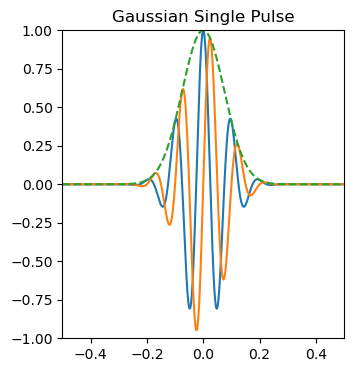

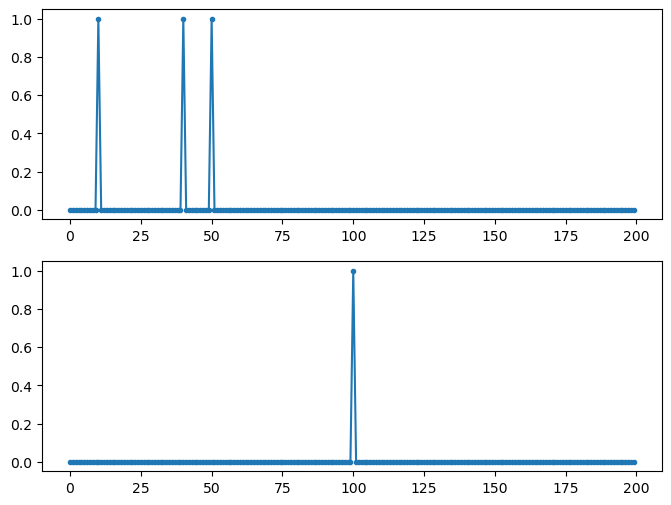

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from scipy import signal


sampling_rate = 16000
time_seconds = 1 
number_of_pulses = 20
pulse_frequency = 1/(time_seconds/(number_of_pulses/2))
#t = np.linspace(-1*time_seconds, time_seconds, sampling_rate, endpoint=False)

t0 = np.linspace(-1*time_seconds, 1*time_seconds, sampling_rate, endpoint=False)

signal_dbfs = 0.8 #-1dBFS



fig1 = plt.figure(figsize = (8,4), facecolor='white')
ax1 = fig1.add_subplot(1, 2, 1)
ax1.set_title("Gaussian Single Pulse")

#ax12= fig1.add_subplot(1, 2, 2)



#ax1 = fig1.add_subplot(1, 1, 1)
#ax1.set_title("Gaussian Single Pulse")
#ax1.set_xlim([-1, 1])
#ax1.set_ylim([-1, 1])

# for slideshows:
m = 32

e_at_zeroposition = np.zeros(m)

for ii in range(m):

    i, q, e = signal.gausspulse(t0, fc=10 + 0*ii, retquad=True, retenv=True)
    

    e_at_zeroposition[ii] = e[0 + 300*ii]

    t1 = t0 + 0.02*ii - 0.5

    ax1.plot(t1, i, t1, q, t1, e, '--')
    ax1.set_xlim([-0.5, 0.5])
    ax1.set_ylim([-1, 1])
    
    plt.savefig(f"{sampling_rate}_{ii}.png", dpi=300)
    
    plt.cla()

print(e_at_zeroposition)

# For static graph:
#ax1 = fig1.add_subplot(1, 1, 1)
ax1.set_title("Gaussian Single Pulse")
ax1.set_xlim([-0.5, 0.5])
ax1.set_ylim([-1, 1])
ax1.plot(t0, i, t0, q, t0, e, '--')



# Scipy.signal.unit_impulse

imp1 = signal.unit_impulse(200, [10,40,50])
imp2 = signal.unit_impulse(200, 'mid')

fig2 = plt.figure(figsize = (8,6), facecolor='white')

ax21 = fig2.add_subplot(2, 1, 1)
ax22 = fig2.add_subplot(2, 1, 2)

ax21.plot(imp1,".-")
ax22.plot(imp2,".-")



plt.show()